In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
PATH = "../../Datasets/"
pd.set_option("display.max_columns", None)
sns.set_style("darkgrid")

In [3]:
dfDay = pd.read_csv(PATH + "Day.csv")
dfDay["Time"] = pd.to_datetime(dfDay["Time"])

In [4]:
dfDay.shape

(3453, 24)

In [5]:
dfDay.columns

Index(['Time', 'O3_flag', 'SO2_flag', 'NO2_flag', 'NO_flag', 'CO_flag',
       'PM10_flag', 'PM2.5_flag', 'WDir_Avg', 'Rain_Tot', 'WDir_SD', 'O3',
       'SO2', 'NO2', 'NO', 'CO', 'PM10', 'PM2.5', 'Temp_Avg', 'RH_Avg',
       'WSpeed_Avg', 'WSpeed_Max', 'Press_Avg', 'Rad_Avg'],
      dtype='object')

In [6]:
dfDay[["Time", "Rad_Avg"]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3453 entries, 0 to 3452
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Time     3453 non-null   datetime64[ns]
 1   Rad_Avg  3265 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 54.1 KB


In [7]:
dfDay[["Time", "Rad_Avg"]].describe()

,Time,Rad_Avg
count,3453,3265.000000
mean,2020-04-23 03:36:26.272806400,240.496423
min,2015-08-01 00:00:00,-2.198284
25%,2017-12-11 00:00:00,204.516944
50%,2020-04-22 00:00:00,242.101720
75%,2022-09-02 00:00:00,285.092285
max,2025-01-27 00:00:00,555.670708
std,NaN,62.606044


In [8]:
def clean(x):
    if x >= 0: return x
    return np.nan

In [10]:
dfDay["Rad_Avg"] = dfDay["Rad_Avg"].apply(clean)

In [11]:
dfDay["Rad_Avg"].describe()

count    3247.000000
mean      241.836719
std        60.127395
min        20.993886
25%       205.839833
50%       242.604656
75%       285.502256
max       555.670708
Name: Rad_Avg, dtype: float64

In [12]:
dfDay["Rad_Avg"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 3453 entries, 0 to 3452
Series name: Rad_Avg
Non-Null Count  Dtype  
--------------  -----  
3247 non-null   float64
dtypes: float64(1)
memory usage: 27.1 KB


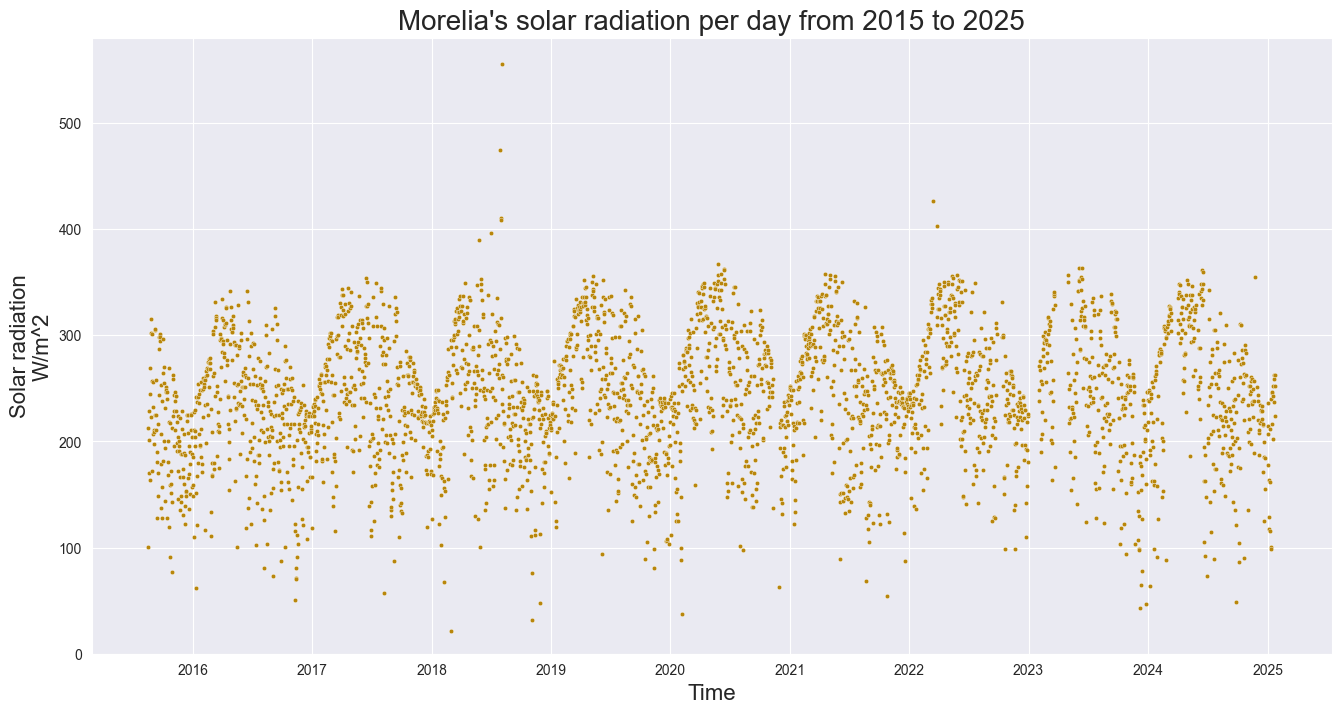

In [16]:
plt.figure(figsize=(16, 8))
sns.scatterplot(x=dfDay["Time"], y=dfDay["Rad_Avg"], s=10, color="darkgoldenrod")
plt.ylim(0, 580)
plt.ylabel("Solar radiation\nW/m^2", size=16)
plt.xlabel("Time", size=16)
plt.title("Morelia's solar radiation per day from 2015 to 2025", size=20)
plt.show()